<a href="https://colab.research.google.com/github/henrykohl/DeepLearningByPytorchTutorial/blob/master/extras/exercises/08_pytorch_paper_replicating_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">08. PyTorch Experiment Tracking Exercises</font>

Welcome to the 08. PyTorch Paper Replicating exercises.

Your objective is to write code to satisify each of the exercises below.

Some starter code has been provided to make sure you have all the resources you need.

> **Note:** There may be more than one solution to each of the exercises.

## Resources

1. These exercises/solutions are based on [section 08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/tjpW_BY8y3g) (but try the exercises yourself first!).
3. See [all solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

> **Note:** The first section of this notebook is dedicated to getting various helper functions and datasets used for the exercises. The exercises start at the heading "Exercise 1: ...".

### Get various imports and helper functions

The code in the following cells prepares imports and data for the exercises below. They are taken from [08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/). 

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+

```
torch version: 1.12.0+cu113
torchvision version: 0.13.0+cu113
```

In [2]:
try:
  import torch
  import torchvision
  assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
  assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")
except:
  print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
  !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
  import torch
  import torchvision
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/nightly/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54

torch version: 2.0.0+cu118
torchvision version: 0.15.1+cu118


In [3]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
  from torchinfo import summary
except:
  print("[INFO] Couldn't find torchinfo... installing it.")
  !pip install -q torchinfo
  from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves
except:
  # Get the going_modular scripts
  print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
  !git clone https://github.com/mrdbourke/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular .
  !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
  !rm -rf pytorch-deep-learning
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 3768, done.
remote: Counting objects: 100% (390/390), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 3768 (delta 209), reused 321 (delta 168), pack-reused 3378
Receiving objects: 100% (3768/3768), 648.94 MiB | 22.15 MiB/s, done.
Resolving deltas: 100% (2165/2165), done.
Updating files: 100% (248/248), done.


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Get data

Want to download the data we've been using in PyTorch Paper Replicating: https://www.learnpytorch.io/08_pytorch_paper_replicating/#1-get-data

In [5]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [6]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

### Preprocess data

Turn images into tensors using same code as PyTorch Paper Replicating section 2.1 and 2.2: https://www.learnpytorch.io/08_pytorch_paper_replicating/#21-prepare-transforms-for-images

In [7]:
# Create image size (from Table 3 in the ViT paper) 
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [8]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
  train_dir=train_dir,
  test_dir=test_dir,
  transform=manual_transforms, # use manually created transforms
  batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f18321ce5f0>,
 ['pizza', 'steak', 'sushi'])

In [9]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

In [10]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

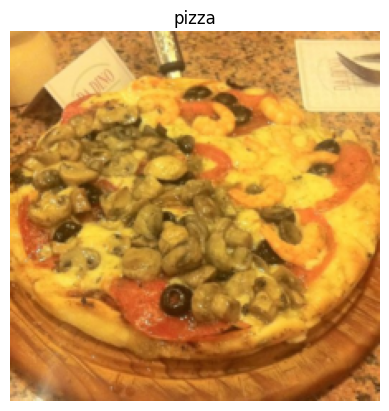

In [11]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

## 1. Replicate the ViT architecture we created with in-built [PyTorch transformer layers](https://pytorch.org/docs/stable/nn.html#transformer-layers).

* You'll want to look into replacing our `TransformerEncoderBlock()` class with [`torch.nn.TransformerEncoderLayer()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer) (these contain the same layers as our custom blocks). 
* You can stack `torch.nn.TransformerEncoderLayer()`'s on top of each other with [`torch.nn.TransformerEncoder()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder).

<font color="purple">Need:

1. PatchEmbedding (turn images into embedded patches)
2. Transformer Encoder layer (this is comprised of alternating MSA and MLP blocks)
3. Stack multiple transformer encoder layers on top of each other
4. MLP head
5. Put it all together to create ViT

### <font color="purple">1. Make PatchEmbedding layer

<font color="purple">Code from: https://www.learnpytorch.io/08_pytorch_paper_replicating/#45-turning-the-vit-patch-embedding-layer-into-a-pytorch-module

In [12]:
# TODO: your code

In [13]:
rand_image_tensor = torch.randn(32, 3, 224, 224) # (batch_size, color_channels, height, width)
rand_image_tensor.shape

torch.Size([32, 3, 224, 224])

In [14]:
# 1. Create a class which subclasses nn.Module
class PatchEmbedding(nn.Module):
  """Turns a 2D input image into a 1D sequence learnable embedding vector.
  
  Args:
    in_channels (int): Number of color channels for the input images. Defaults to 3.
    patch_size (int): Size of patches to convert input image into. Defaults to 16.
    embedding_dim (int): Size of embedding to turn image into. Defaults to 768. 
  """
  # 2. Initialize the class with appropriate variables
  def __init__(self,
          in_channels:int=3,
          patch_size:int=16,
          embedding_dim:int= 768):
    super().__init__()
    
    self.patch_size = patch_size

    # 3. Create a layer to turn an image into patches
    self.patcher = nn.Conv2d(in_channels=in_channels,
                  out_channels=embedding_dim,
                  kernel_size=patch_size,
                  stride=patch_size,
                  padding=0)

    # 4. Create a layer to flatten the patch feature maps into a single dimension
    self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                     end_dim=3)
    
  # 5. Define the forward method
  def forward(self,x):
    # Create assertion to check that inputs are the correct shape
    image_resolution = x.shape[-1]
    assert image_resolution % self.patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {self.patch_size}"

    # Perform the forward pass   
    x_patched=self.patcher(x)
    x_flattened=self.flatten(x_patched)

    # 6. Make sure the output shape has the right order 
    return x_flattened.permute(0, 2, 1)  # adjust so the embedding is on the final dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]
    

In [15]:
# patch_embedding = PatchEmbedding(patch_size=16) 
"""()中，可以不需要patch_size=16"""
patch_embedding = PatchEmbedding()  
patch_embedding_output = patch_embedding(rand_image_tensor)
print(f"Input shape: {rand_image_tensor.shape}")
print(f"Output shape: {patch_embedding_output.shape} -> (batch_size, num_patches, embedding_dim)") 

Input shape: torch.Size([32, 3, 224, 224])
Output shape: torch.Size([32, 196, 768]) -> (batch_size, num_patches, embedding_dim)


In [16]:
torch.__version__

'2.0.0+cu118'

### <font color="purple">2. TransformerEncoderLayer 

<font color="purple">Can build a Transformer Encoder Layer with: https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer

In [17]:
# Hyperparameters from Table 1 and Table 3 for ViT-Base
transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=768, 
                              nhead=12, 
                              dim_feedforward=3072, 
                              dropout=0.1, 
                              activation="gelu", 
                              batch_first=False, 
                              norm_first=False)

"""1MA+2L+2N+3D"""

transformer_encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [17]:
from torchinfo import summary 

summary(model=transformer_encoder_layer,
    input_size=patch_embedding_output.shape)

/usr/local/lib/python3.10/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.10/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  


Layer (type:depth-idx)                   Output Shape              Param #
TransformerEncoderLayer                  [32, 196, 768]            --
├─MultiheadAttention: 1-1                [32, 196, 768]            2,362,368
├─Dropout: 1-2                           [32, 196, 768]            --
├─LayerNorm: 1-3                         [32, 196, 768]            1,536
├─Linear: 1-4                            [32, 196, 3072]           2,362,368
├─Dropout: 1-5                           [32, 196, 3072]           --
├─Linear: 1-6                            [32, 196, 768]            2,360,064
├─Dropout: 1-7                           [32, 196, 768]            --
├─LayerNorm: 1-8                         [32, 196, 768]            1,536
Total params: 7,087,872
Trainable params: 7,087,872
Non-trainable params: 0
Total mult-adds (M): 151.22
Input size (MB): 19.27
Forward/backward pass size (MB): 269.75
Params size (MB): 18.90
Estimated Total Size (MB): 307.92

### <font color="purple">3. Stack Transformer Encoder Layers on top of each other to make the full Transformer Encoder

<font color="purple">According to Table 1 of the ViT paper, the ViT-Base model uses a stack of 12 Transformer Encoder layers.

We can stack Transformer Encoder Layers on top of each other using: https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder</font> 

In [18]:
transformer_encoder = nn.TransformerEncoder(encoder_layer=transformer_encoder_layer,
                         num_layers=12)
# transformer_encoder

In [19]:
# summary(model=transformer_encoder,
#         input_size=patch_embedding_output.shape)

### <font color="purple">5. Put it all together and create ViT 

We're skipping step 4, so that can be incorported the into the overall ViT architecture.</font>

In [19]:
"""(步驟1:建立ViT class)"""
class ViT(nn.Module):
  """(步驟2:初始化)"""
  def __init__(self,
         img_size=224, # from Table 3
         num_channels=3,
         patch_size=16,
         embedding_dim=768, # from Table 1
         dropout=0.1, 
         mlp_size=3072, # from Table 1
         num_transformer_layers=12, # from Table 1
         num_heads=12, # from Table 1 (number of multi-head self attention heads)
         num_classes=1000): # generic number of classes (this can be adjusted
    super().__init__()

    # Assert image size is divisible by patch size
    """(步驟3:整除確認)"""
    assert img_size % patch_size == 0, "Image size must be divisble by patch size."

    # 1. Create patch embedding
    """(步驟8:建立patch embedding layer)"""
    self.patch_embedding = PatchEmbedding(in_channels=num_channels,
                         patch_size=patch_size,
                         embedding_dim=embedding_dim)
    
    # 2. Create class token
    """(步驟5:建立class_token)"""
    self.class_token = nn.Parameter(torch.rand(1, 1, embedding_dim),
                      requires_grad=True)
    
    # 3. Create positional embedding
    """(步驟4:計算N - num_patches)"""
    num_patches = (img_size*img_size) // patch_size**2 # N = HW/P^2
    """(步驟6:建立 positional embedding)"""
    self.positional_embedding = nn.Parameter(torch.randn(1, num_patches+1, embedding_dim))

    # 4. Create patch + position embedding dropout 
    """(步驟7:建立embedding dropout)"""
    self.embedding_dropout = nn.Dropout(p=0.1)

    # 5. Create Transformer Encoder layer (single)
    # self.transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim,
    #                                   nhead=num_heads,
    #                                   dim_feedforward=mlp_size,
    #                                   activation="gelu",
    #                                   batch_first=True,
    #                                   norm_first=True)

    # 5. Create stack Transformer Encoder layers (stacked single layers)
    """(步驟9: 使用nn.TransformerEncoderLayer建立TransformerEncoder)"""
    self.transformer_encoder = nn.TransformerEncoder(encoder_layer=nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                      nhead=num_heads,
                                                      dim_feedforward=mlp_size,
                                                      activation="gelu",
                                                      batch_first=True,
                                                      norm_first=True),# Create a single Transformer Encoder Layer
                                num_layers=num_transformer_layers)
    
    # 7. Create MLP head(classifier會不會更好)
    """(步驟10: 建立classifier層)""" 
    self.mlp_head = nn.Sequential(
        nn.LayerNorm(normalized_shape=embedding_dim),
        nn.Linear(in_features=embedding_dim,
             out_features=num_classes)
    )

  """(步驟11: 建立forward method)"""
  def forward(self,x):
    # Get some dimensions from x
    """(步驟12:獲得batch size)""" 
    batch_size = x.shape[0]

    # Create the patch embedding
    """(步驟14: 建立patch embedding)""" 
    x = self.patch_embedding(x)
    # print(x.shape) # 測試用

    # First, expand the class token across the batch size
    """(步驟13: 根據batch size擴展class_token)"""
    class_token = self.class_token.expand(batch_size,-1,-1) # "-1" means infer the dimension

    # Prepend the class token to the patch embedding
    """(步驟15: 結合class_token)"""
    x = torch.cat((class_token,x),dim=1)
    # print(x.shape) # 測試用

    # Add the positional embedding to patch embedding with class token
    """(步驟16: +上positional_embedding)"""
    x = self.positional_embedding + x
    # print(x.shape) # 測試用

    # Dropout on patch + positional embedding
    """(步驟17: 使用dropout)"""
    x = self.embedding_dropout(x)

    # Pass embedding through Transformer Encoder stack
    """(步驟18: 使用transformer_encoder)""" 
    x = self.transformer_encoder(x)

    # Pass 0th index of x through MLP head(classifier會不會更好)
    """(步驟19: []中的冒號，指的是一個batch中的所有筆數，0指的是class向量)"""
    x = self.mlp_head(x[:,0])

    return x

In [21]:
"""測試ViT輸出"""
demo_img = torch.randn(1, 3, 224, 224).to(device)
print(demo_img.shape) 

# Create ViT
vit = ViT(num_classes=len(class_names)).to(device)
vit(demo_img)

torch.Size([1, 3, 224, 224])


tensor([[ 0.5193, -0.4211, -0.0392]], grad_fn=<AddmmBackward0>)

In [22]:
summary(model=ViT(num_classes=len(class_names)) ,
        input_size=demo_img.shape)

Layer (type:depth-idx)                        Output Shape              Param #
ViT                                           [1, 3]                    152,064
├─PatchEmbedding: 1-1                         [1, 196, 768]             --
│    └─Conv2d: 2-1                            [1, 768, 14, 14]          590,592
│    └─Flatten: 2-2                           [1, 768, 196]             --
├─Dropout: 1-2                                [1, 197, 768]             --
├─TransformerEncoder: 1-3                     [1, 197, 768]             --
│    └─ModuleList: 2-3                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-2      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-3      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-4      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-5      [1, 197, 76

In [23]:
len(class_names)

3

In [24]:
embedding_dim = 768
class_token = nn.Parameter(torch.randn(1,1,embedding_dim),
                      requires_grad=True)
class_token.requires_grad

True

In [25]:
batch_size = 32
print(class_token.shape)
class_token.expand(batch_size,-1,-1).shape # "-1" means to infer the dimension

torch.Size([1, 1, 768])


torch.Size([32, 1, 768])

In [26]:
patch_size = 16
img_size = 224
num_patches = (img_size*img_size) // patch_size**2
pos_embedding = nn.Parameter(torch.randn(1,num_patches+1,embedding_dim))
pos_embedding.shape

torch.Size([1, 197, 768])

## 2. Turn the custom ViT architecture we created into a Python script, for example, `vit.py`.

* You should be able to import an entire ViT model using something like`from vit import ViT`.
* We covered the art of turning code cells into Python scrips in [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/). 


In [27]:
# TODO: your code

In [27]:
%%writefile vit.py
import torch
from torch import nn

# 1. Create a class which subclasses nn.Module
class PatchEmbedding(nn.Module):
  """Turns a 2D input image into a 1D sequence learnable embedding vector.
  
  Args:
    in_channels (int): Number of color channels for the input images. Defaults to 3.
    patch_size (int): Size of patches to convert input image into. Defaults to 16.
    embedding_dim (int): Size of embedding to turn image into. Defaults to 768. 
  """
  # 2. Initialize the class with appropriate variables
  def __init__(self,
          in_channels:int=3,
          patch_size:int=16,
          embedding_dim:int= 768):
    super().__init__()
    
    self.patch_size = patch_size

    # 3. Create a layer to turn an image into patches
    self.patcher = nn.Conv2d(in_channels=in_channels,
                  out_channels=embedding_dim,
                  kernel_size=patch_size,
                  stride=patch_size,
                  padding=0)

    # 4. Create a layer to flatten the patch feature maps into a single dimension
    self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                     end_dim=3)
    
  # 5. Define the forward method
  def forward(self,x):
    # Create assertion to check that inputs are the correct shape
    image_resolution = x.shape[-1]
    assert image_resolution % self.patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {self.patch_size}"

    # Perform the forward pass   
    x_patched=self.patcher(x)
    x_flattened=self.flatten(x_patched)

    # 6. Make sure the output shape has the right order 
    return x_flattened.permute(0, 2, 1)  # adjust so the embedding is on the final dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]

class ViT(nn.Module):
  
  def __init__(self,
         img_size=224, # from Table 3
         num_channels=3,
         patch_size=16,
         embedding_dim=768, # from Table 1
         dropout=0.1, 
         mlp_size=3072, # from Table 1
         num_transformer_layers=12, # from Table 1
         num_heads=12, # from Table 1 (number of multi-head self attention heads)
         num_classes=1000): # generic number of classes (this can be adjusted
    super().__init__()

    # Assert image size is divisible by patch size
    assert img_size % patch_size == 0, "Image size must be divisble by patch size."

    # 1. Create patch embedding
    self.patch_embedding = PatchEmbedding(in_channels=num_channels,
                         patch_size=patch_size,
                         embedding_dim=embedding_dim)
    
    # 2. Create class token
    self.class_token = nn.Parameter(torch.rand(1, 1, embedding_dim),
                      requires_grad=True)
    
    # 3. Create positional embedding
    num_patches = (img_size*img_size) // patch_size**2 # N = HW/P^2
    self.positional_embedding = nn.Parameter(torch.randn(1, num_patches+1, embedding_dim))

    # 4. Create patch + position embedding dropout 
    self.embedding_dropout = nn.Dropout(p=0.1)

    # 5. Create Transformer Encoder layer (single)
    # self.transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim,
    #                                   nhead=num_heads,
    #                                   dim_feedforward=mlp_size,
    #                                   activation="gelu",
    #                                   batch_first=True,
    #                                   norm_first=True)

    # 5. Create stack Transformer Encoder layers (stacked single layers)
    self.transformer_encoder = nn.TransformerEncoder(encoder_layer=nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                      nhead=num_heads,
                                                      dim_feedforward=mlp_size,
                                                      activation="gelu",
                                                      batch_first=True,
                                                      norm_first=True),# Create a single Transformer Encoder Layer
                                num_layers=num_transformer_layers)
    
    # 7. Create MLP head(classifier會不會更好)
    self.mlp_head = nn.Sequential(
        nn.LayerNorm(normalized_shape=embedding_dim),
        nn.Linear(in_features=embedding_dim,
             out_features=num_classes)
    )

  def forward(self,x):
    # Get some dimensions from x
    batch_size = x.shape[0]

    # Create the patch embedding
    x = self.patch_embedding(x)
    # print(x.shape) # 測試用

    # First, expand the class token across the batch size
    class_token = self.class_token.expand(batch_size,-1,-1) # "-1" means infer the dimension

    # Prepend the class token to the patch embedding
    x = torch.cat((class_token,x),dim=1)
    # print(x.shape) # 測試用

    # Add the positional embedding to patch embedding with class token
    x = self.positional_embedding + x
    # print(x.shape) # 測試用

    # Dropout on patch + positional embedding
    x = self.embedding_dropout(x)

    # Pass embedding through Transformer Encoder stack
    x = self.transformer_encoder(x)

    # Pass 0th index of x through MLP head
    x = self.mlp_head(x[:,0])

    return x

Writing vit.py


In [28]:
!python vit.py

In [30]:
from vit import ViT
imported_vit = ViT()
summary(model=imported_vit,
        input_size=(1,3,224,224))

Layer (type:depth-idx)                        Output Shape              Param #
ViT                                           [1, 1000]                 152,064
├─PatchEmbedding: 1-1                         [1, 196, 768]             --
│    └─Conv2d: 2-1                            [1, 768, 14, 14]          590,592
│    └─Flatten: 2-2                           [1, 768, 196]             --
├─Dropout: 1-2                                [1, 197, 768]             --
├─TransformerEncoder: 1-3                     [1, 197, 768]             --
│    └─ModuleList: 2-3                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-2      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-3      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-4      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-5      [1, 197, 76

## 3. Train a pretrained ViT feature extractor model (like the one we made in [08. PyTorch Paper Replicating section 10](https://www.learnpytorch.io/08_pytorch_paper_replicating/#10-bring-in-pretrained-vit-from-torchvisionmodels-on-same-dataset)) on 20% of the pizza, steak and sushi data like the dataset we used in [07. PyTorch Experiment Tracking section 7.3](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#73-download-different-datasets) 
* See how it performs compared to the EffNetB2 model we compared it to in [08. PyTorch Paper Replicating section 10.6](https://www.learnpytorch.io/08_pytorch_paper_replicating/#106-save-feature-extractor-vit-model-and-check-file-size).

In [31]:
# TODO: your code

In [32]:
set_seeds()

In [33]:
# Create ViT feature extractor model
import torchvision

# Download pretrained ViT weights and model
vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT # "DEFAULT" means best available
pretrained_vit = torchvision.models.vit_b_16(weights=vit_weights)

# Freeze all layers in pretrained ViT model 
for params in pretrained_vit.parameters():
  params.requires_grad = False

# Update the preatrained ViT head 
embedding_dim = 768 # ViT_Base
pretrained_vit.heads = nn.Sequential(
    nn.LayerNorm(normalized_shape=embedding_dim),
    nn.Linear(in_features=embedding_dim,
              out_features=len(class_names))
)

# Print a summary
summary(model=pretrained_vit,
        input_size=(1,3,224,224),# (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size","output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)



Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:03<00:00, 86.7MB/s]


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

In [34]:
# Get 20% of the data
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                     destination="pizza_steak_sushi_20_percent"
)

# Setup train and test directories
train_dir_20_percent = data_20_percent_path / "train"
# test_dir_20_percent = data_20_percent_path / "test" # don't need 20% test data as the model in 07. PyTorch Experiment Tracking section 7.3 tests on the 10% dataset not the 20%


# Preprocess the data
vit_transforms = vit_weights.transforms() # get transforms from vit_weights
train_dataloader_20_percent, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir_20_percent,
                                                  test_dir=test_dir,
                                                  transform=vit_transforms,
                                                  batch_size=32)



[INFO] Did not find data/pizza_steak_sushi_20_percent directory, creating one...
[INFO] Downloading pizza_steak_sushi_20_percent.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip...
[INFO] Unzipping pizza_steak_sushi_20_percent.zip data...


In [35]:
len(train_dataloader), len(train_dataloader_20_percent), len(test_dataloader)

(8, 15, 3)

In [36]:
# Train a pretrained ViT feature extractor
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn= nn.CrossEntropyLoss()
set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                    train_dataloader=train_dataloader_20_percent,
                    test_dataloader=test_dataloader,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    epochs=10,
                    device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5830 | train_acc: 0.8167 | test_loss: 0.2185 | test_acc: 0.8873
Epoch: 2 | train_loss: 0.1977 | train_acc: 0.9229 | test_loss: 0.2060 | test_acc: 0.9280
Epoch: 3 | train_loss: 0.1343 | train_acc: 0.9729 | test_loss: 0.1893 | test_acc: 0.9688
Epoch: 4 | train_loss: 0.0978 | train_acc: 0.9750 | test_loss: 0.1706 | test_acc: 0.9583
Epoch: 5 | train_loss: 0.0839 | train_acc: 0.9771 | test_loss: 0.1703 | test_acc: 0.9583
Epoch: 6 | train_loss: 0.0935 | train_acc: 0.9500 | test_loss: 0.1678 | test_acc: 0.9583
Epoch: 7 | train_loss: 0.0660 | train_acc: 0.9812 | test_loss: 0.1782 | test_acc: 0.9479
Epoch: 8 | train_loss: 0.0596 | train_acc: 0.9896 | test_loss: 0.1898 | test_acc: 0.9280
Epoch: 9 | train_loss: 0.0634 | train_acc: 0.9917 | test_loss: 0.1965 | test_acc: 0.9384
Epoch: 10 | train_loss: 0.0402 | train_acc: 0.9938 | test_loss: 0.1848 | test_acc: 0.9583


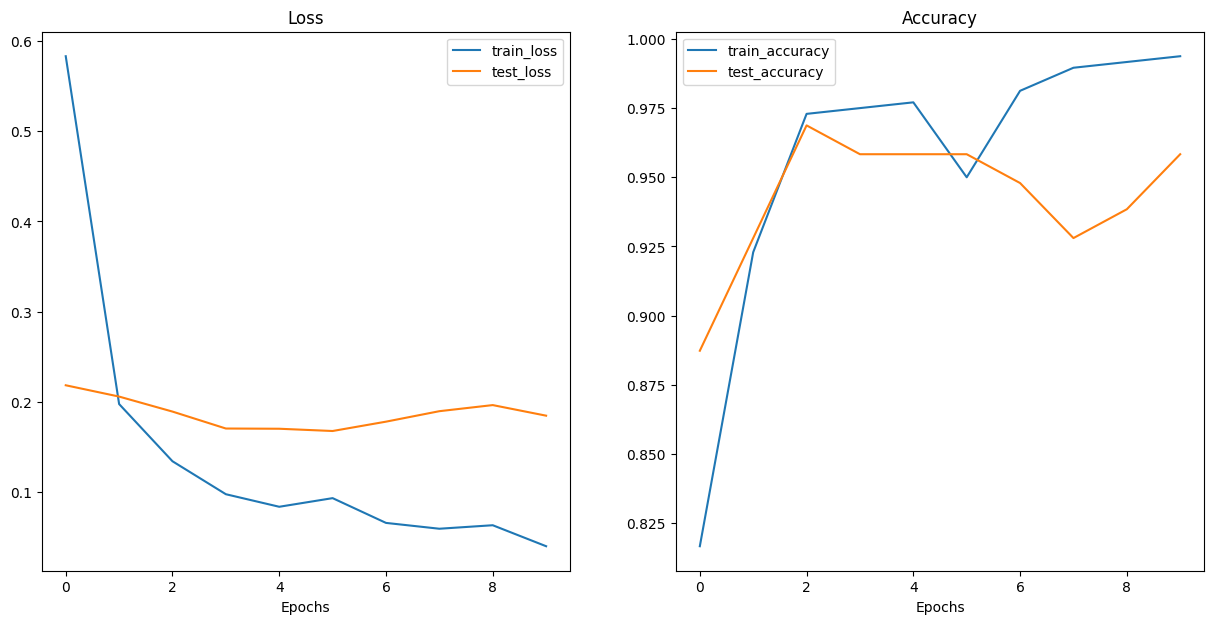

In [37]:
# Examine results
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

## 4. Try repeating the steps from excercise 3 but this time use the "`ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1`" pretrained weights from [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16).
* Note: ViT pretrained with SWAG weights has a minimum input image size of (384, 384), though this is accessible in the weights `.transforms()` method.

In [38]:
# TODO: your code

In [39]:
# Create ViT feature extractor model
import torchvision


# Download pretrained ViT weights and model
vit_weights_swag  = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1 # # get SWAG weights
pretrained_vit_swag = torchvision.models.vit_b_16(weights=vit_weights_swag)


# Freeze all layers in pretrained ViT model 
for params in pretrained_vit_swag.parameters():
  params.requires_grad = False


# Update the preatrained ViT head 
embedding_dim = 768 # ViT_Base
pretrained_vit_swag.heads = nn.Sequential(
    nn.LayerNorm(normalized_shape=embedding_dim),
    nn.Linear(in_features=embedding_dim,
          out_features=len(class_names))
)


# Print a summary
summary(model=pretrained_vit_swag,
    input_size=(1,3,384,384),# (batch_size, color_channels, height, width)
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size","output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

Downloading: "https://download.pytorch.org/models/vit_b_16_swag-9ac1b537.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16_swag-9ac1b537.pth
100%|██████████| 331M/331M [00:01<00:00, 210MB/s]


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 384, 384]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 384, 384]     [1, 768, 24, 24]     (590,592)            False
├─Encoder (encoder)                                          [1, 577, 768]        [1, 577, 768]        443,136              False
│    └─Dropout (dropout)                                     [1, 577, 768]        [1, 577, 768]        --                   --
│    └─Sequential (layers)                                   [1, 577, 768]        [1, 577, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 577, 768]        [1, 577, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 577, 768]        [1, 5

ViT pretrained SWAG weights has a minimum input image size of <font color="red">**(384, 384)**</font>, this is accessible through the `.transforms()` method of the ViT SWAG weights: https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16

In [40]:
# Check out transforms for pretrained ViT with SWAG weights
vit_transforms_swag = vit_weights_swag.transforms() # get transforms from vit_weights_swag
vit_transforms_swag

ImageClassification(
    crop_size=[384]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [41]:
# Get 20% of the data (前面已執行過)
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                     destination="pizza_steak_sushi_20_percent"
)

# Setup train and test directories (前面已執行過)
train_dir_20_percent = data_20_percent_path / "train" 


# Preprocess the data
vit_transforms = vit_weights.transforms() # get transforms from vit_weights
train_dataloader_20_percent, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir_20_percent,
                                                  test_dir=test_dir, # use 10% data for testing
                                                  transform=vit_transforms_swag,
                                                  batch_size=32)

[INFO] data/pizza_steak_sushi_20_percent directory exists, skipping download.


In [42]:
# Train a pretrained ViT feature extractor with SWAG weights
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params=pretrained_vit_swag.parameters(),
                             lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

set_seeds()
pretrained_vit_swag_results = engine.train(model=pretrained_vit_swag,
                    train_dataloader=train_dataloader_20_percent,
                    test_dataloader=test_dataloader,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    epochs=10,
                    device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4925 | train_acc: 0.8708 | test_loss: 0.0893 | test_acc: 0.9792
Epoch: 2 | train_loss: 0.0696 | train_acc: 0.9833 | test_loss: 0.0659 | test_acc: 0.9792
Epoch: 3 | train_loss: 0.0441 | train_acc: 0.9896 | test_loss: 0.0531 | test_acc: 0.9792
Epoch: 4 | train_loss: 0.0332 | train_acc: 0.9917 | test_loss: 0.0497 | test_acc: 0.9792
Epoch: 5 | train_loss: 0.0266 | train_acc: 0.9938 | test_loss: 0.0500 | test_acc: 0.9792
Epoch: 6 | train_loss: 0.0227 | train_acc: 0.9938 | test_loss: 0.0472 | test_acc: 0.9792
Epoch: 7 | train_loss: 0.0183 | train_acc: 0.9979 | test_loss: 0.0453 | test_acc: 0.9792
Epoch: 8 | train_loss: 0.0220 | train_acc: 0.9979 | test_loss: 0.0454 | test_acc: 0.9792
Epoch: 9 | train_loss: 0.0143 | train_acc: 1.0000 | test_loss: 0.0527 | test_acc: 0.9896
Epoch: 10 | train_loss: 0.0135 | train_acc: 0.9979 | test_loss: 0.0454 | test_acc: 0.9792


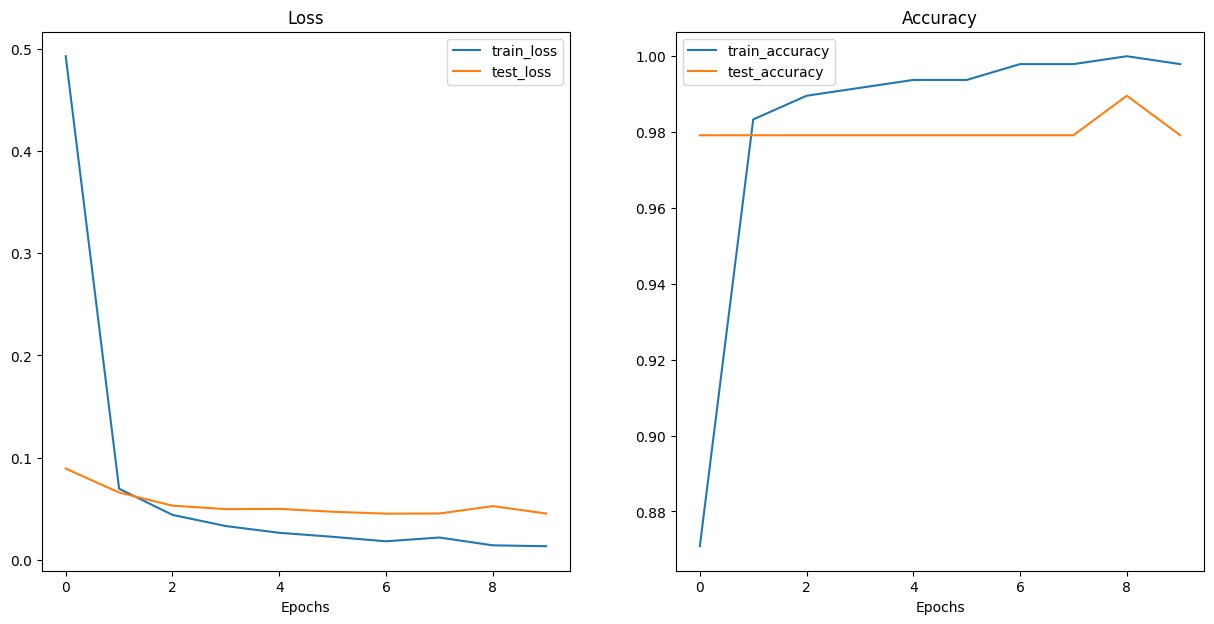

In [43]:
# Examine results
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_swag_results)

## **Bonus: Get the "most wrong" examples from the test dataset**
Since our ViT model trained with SWAG weights performed so well on the test set (close to 99% accuracy), let's see which samples it actually got wrong...

Code from: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/06_pytorch_transfer_learning_exercise_solutions.ipynb exercise 2

In [61]:
# a = ['a1','a2','a3']

In [63]:
# temps = {}
# for txt in a:
#   print(txt)

a1
a2
a3


In [64]:
# Get all test data paths
from tqdm import tqdm
from pathlib import Path
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_labels = [path.parent.stem for path in test_data_paths]

from PIL import Image

# Create a function to return a list of dictionaries with sample, label, prediction, pred prob
def pred_and_store(test_paths, model, transform, class_names, device):
  test_pred_list = []
  for path in tqdm(test_paths):
    # Create empty dict to store info for each sample
    pred_dict = {}

    # Get sample path
    pred_dict["image_path"] = path

    # Get class name
    class_name = path.parent.stem
    pred_dict["class_name"] = class_name

    # Get prediction and prediction probability
    from PIL import Image
    img = Image.open(path)# open image
    transformed_image = transform(img).unsequeeze(0) # transform image and add batch dimension

    model.eval()
    with torch.inference_mode():
      pred_logit = model(transformed_image.to(device))
      pred_prob = torch.softmax(pred_logit, dim=1)
      pred_label = torch.argmax(pred_prob, dim=1)
      pred_class = class_names[pred_logit.cpu()]

      # Make sure things in the dictionary are back on the CPU
      pred_dict["pred_prob"] = pred_prob.unsqueeze(0).max().cpu().item()
      pred_dict["pred_class"] = pred_class

    # Does the pred match the true label?
    pred_dict["correct"] = class_name == pred_class

    # print(pred_dict)
    # Add the dictionary to the list of preds
    test_pred_list.append(pred_dic)

  return test_pred_list  
    
test_pred_dicts = pred_and_store(test_paths=test_data_paths, 
                  model=pretrained_vit_swag, 
                  transform=vit_transforms_swag, 
                  class_names=class_names, 
                  device=device)

test_pred_dicts[:5]

  0%|          | 0/75 [00:00<?, ?it/s]


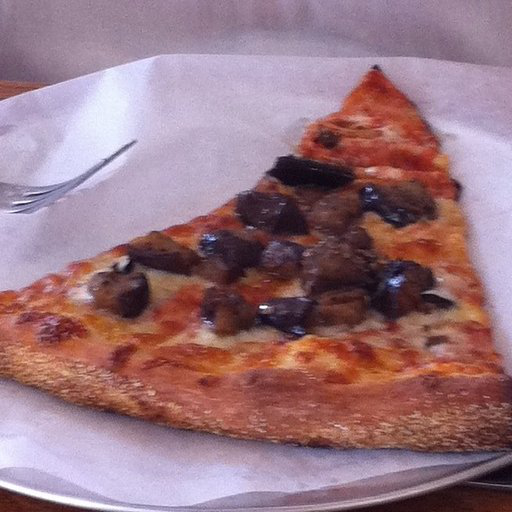

In [68]:
# 測試 PIL.Image 秀圖
# from PIL import Image
# path = next(iter(test_data_paths))
# img = Image.open(path)
# img

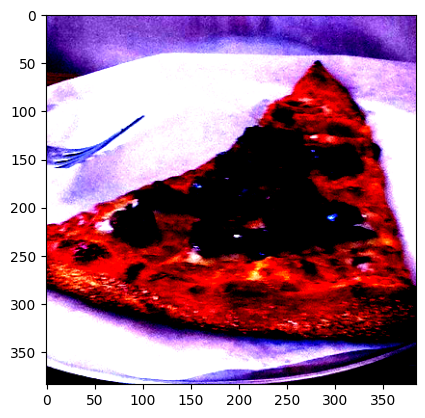

In [71]:
# plt.imshow(  vit_transforms_swag(img).permute(1, 2, 0)  )

In [56]:
# Path(test_dir).glob("*/*.jpg"), test_dir.glob("*/*.jpg") # 相同的因為test_dir就是一個Path物件

(<generator object Path.glob at 0x7f942c91bd10>,
 <generator object Path.glob at 0x7f942c91bd80>)

In [4]:
# Turn the test_pred_dicts into a DataFrame
import pandas as pd
test_pred_df = pd.DataFrame(test_pred_dicts)

# Sort DataFrame by correct then by pred_prob 
top_5_most_wrong = 
top_5_most_wrong


In [ ]:
# How many samples from the test dataset did our model get correct?



In [ ]:
import torchvision
import matplotlib.pyplot as plt
# Plot the top 5 most wrong images


# 5. Our custom ViT model architecture closely mimics that of the ViT paper, however, our training recipe misses a few things. 
* Research some of the following topics from Table 3 in the ViT paper that we miss and write a sentence about each and how it might help with training:
    * **ImageNet-22k pretraining** 
    * **Learning rate warmup** 
    * **Learning rate decay** 
    * **Gradient clipping** 

In [ ]:
# TODO: your explanations of the above terms